# Building a CNN using Keras
       Dataset Fashion MNIST

In [1]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

Using TensorFlow backend.


# Data Preparation

In [25]:
x = pd.read_csv("./fashion-mnist.csv")
x_ = np.array(x)

split = int(x_.shape[0]*.8)

X = x_[:split,1:]
X = X/255.0
Y = x_[:split,0]

xt = x_[split:,1:]
yt = x_[split:,0]

print(X.shape,Y.shape)
print(xt.shape,yt.shape)

(8000, 784) (8000,)
(2000, 784) (2000,)


In [26]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(Y)

X_test = xt.reshape((-1,28,28,1))
Y_test = np_utils.to_categorical(yt)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(8000, 28, 28, 1) (8000, 10)
(2000, 28, 28, 1) (2000, 10)


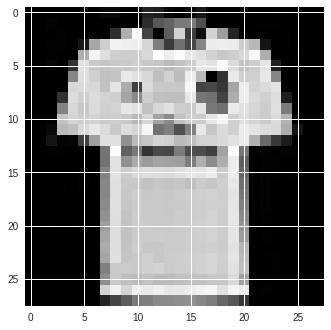

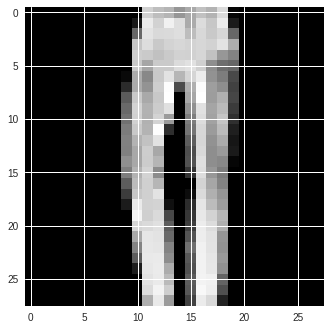

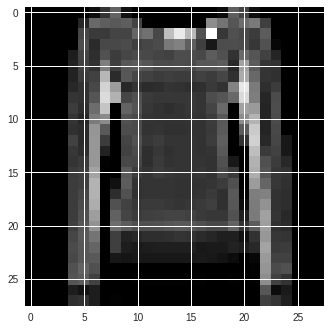

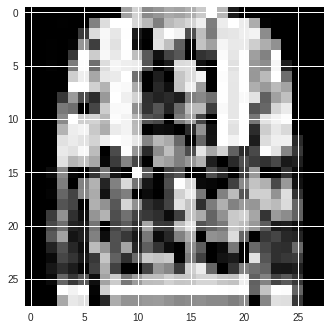

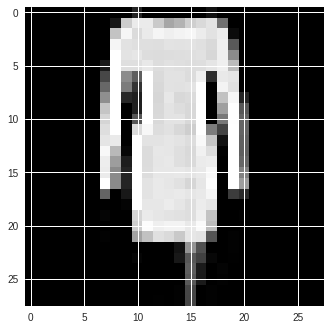

In [27]:
for i in range(5):
    plt.figure(i)
    plt.imshow(X_train[i].reshape(28,28),cmap='gray')
    plt.show()

# CNN Model 

In [28]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(4,4),activation='relu'))
model.add(Convolution2D(8,(2,2),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 32)          32800     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 8)           1032      
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
__________

In [29]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

hist = model.fit(X_train,Y_train,epochs=10,shuffle=True,batch_size=256,validation_split=0.20)

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 16s 2ms/step - loss: 1.5987 - acc: 0.4413 - val_loss: 1.0056 - val_acc: 0.6369
Epoch 2/10
6400/6400 [==============================] - 15s 2ms/step - loss: 0.8408 - acc: 0.6903 - val_loss: 0.7793 - val_acc: 0.7194
Epoch 3/10
6400/6400 [==============================] - 15s 2ms/step - loss: 0.6618 - acc: 0.7561 - val_loss: 0.6683 - val_acc: 0.7462
Epoch 4/10
6400/6400 [==============================] - 16s 3ms/step - loss: 0.5792 - acc: 0.7831 - val_loss: 0.6163 - val_acc: 0.7844
Epoch 5/10
6400/6400 [==============================] - 17s 3ms/step - loss: 0.5305 - acc: 0.8045 - val_loss: 0.5833 - val_acc: 0.7881
Epoch 6/10
6400/6400 [==============================] - 17s 3ms/step - loss: 0.4925 - acc: 0.8231 - val_loss: 0.5711 - val_acc: 0.7913
Epoch 7/10
6400/6400 [==============================] - 18s 3ms/step - loss: 0.4604 - acc: 0.8352 - val_loss: 0.5250 - val_acc: 0.8169
Epoch 8

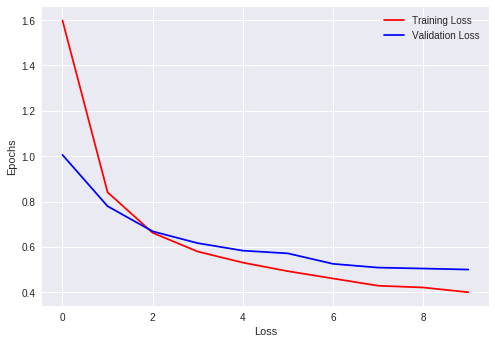

In [30]:
plt.figure(0)
plt.plot(hist.history['loss'],c='red',label='Training Loss')
plt.plot(hist.history['val_loss'],'b',label='Validation Loss')
plt.style.use('seaborn')
plt.legend()
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.show()

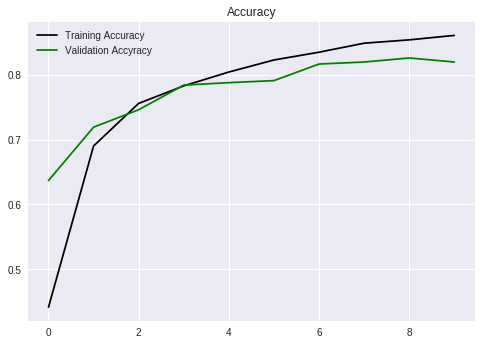

In [31]:

plt.plot(hist.history['acc'],c='black',label='Training Accuracy')
plt.plot(hist.history['val_acc'],'g',label='Validation Accyracy')
plt.style.use('seaborn')
plt.legend()
plt.title('Accuracy')
plt.show()

In [32]:
print("Testing Accuracy : %.4f"%(model.evaluate(X_test,Y_test)[1]))

2000/2000 [==============================] - 1s 496us/step
Testing Accuracy : 0.8140
